In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import io
import matplotlib.pyplot as plt
import os
import sys
import h5py
import json

sys.path.append('/Users/rgao/Documents/Code/research/neurodsp/')
from neurodsp import spectral
import neurodsp as ndsp

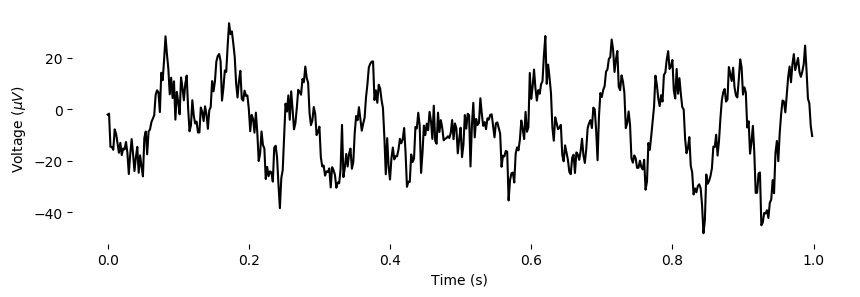

In [3]:
datafolder = '/Users/rgao/Documents/Data/EEGData_Tom/'
data = io.loadmat(datafolder+'1011.mat', squeeze_me=True)
fs = 500.
x = data['oz_trial_data'][10150:10650]
t = np.arange(len(x))/fs
plt.figure(figsize=(10,3))
plt.plot(t, x, 'k')
plt.xlabel('Time (s)')
plt.ylabel(r"Voltage ($\mu V$)")
plt.box('off')

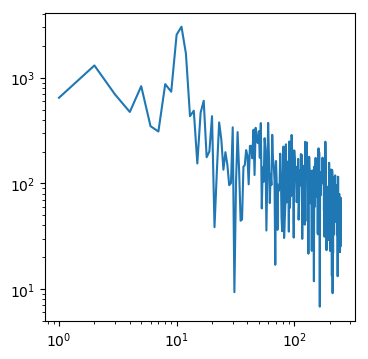

In [4]:
FC = np.fft.fft(x)
f_axis = np.fft.fftfreq(len(x), 1./fs)
plt.loglog(f_axis, np.abs(FC))

In [5]:
# DO THE TILT
# make the 1/f mask
f_rotation = 30.
f_exp = -0.2
f_mask = 10**(np.log10(np.abs(f_axis))*f_exp)
f_mask[0]=1.
f_mask = f_mask/f_mask[np.where(f_axis==f_rotation)]

/Users/rgao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


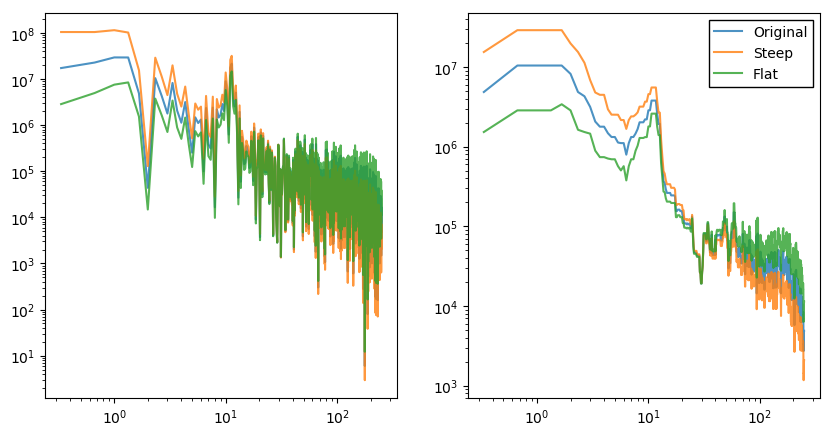

In [32]:
# compute the steepened and flattened spectra
FC_steep = FC * f_mask
FC_flat = FC / f_mask

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.loglog(f_axis, np.abs(FC)**2, alpha=0.8)
plt.loglog(f_axis, np.abs(FC_steep)**2, alpha=0.8)
plt.loglog(f_axis, np.abs(FC_flat)**2, alpha=0.8)

# smooth
plt.subplot(1,2,2)
plt.loglog(f_axis, sp.signal.medfilt(np.abs(FC)**2, 11), alpha=0.8)
plt.loglog(f_axis, sp.signal.medfilt(np.abs(FC_steep)**2, 11), alpha=0.8)
plt.loglog(f_axis, sp.signal.medfilt(np.abs(FC_flat)**2, 11), alpha=0.8)
plt.legend(('Original', 'Steep', 'Flat'))

/Users/rgao/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


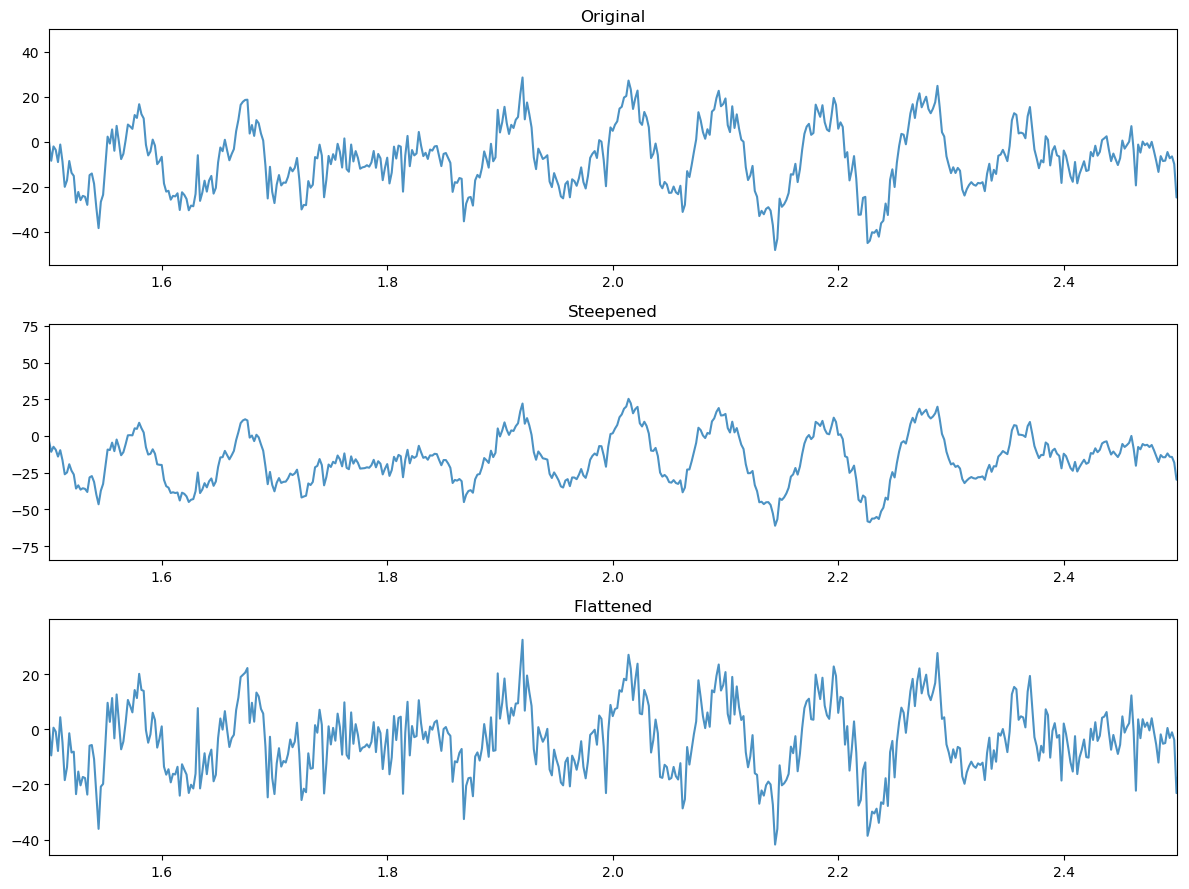

In [39]:
xl = [1.5, 2.5]
x_recon = np.fft.ifft(FC)
x_recon_steep = np.fft.ifft(FC_steep)
x_recon_flat = np.fft.ifft(FC_flat)
plt.figure(figsize=(12,9))
plt.subplot(3,1,1)
plt.plot(t, x, alpha=0.8)
plt.title('Original')
plt.xlim(xl)
plt.subplot(3,1,2)
plt.plot(t, x_recon_steep, alpha=0.8)
plt.title('Steepened')
plt.xlim(xl)
plt.subplot(3,1,3)
plt.plot(t, x_recon_flat, alpha=0.8)
plt.title('Flattened')
plt.xlim(xl)
plt.tight_layout()

/Users/rgao/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(1.5, 2.5)

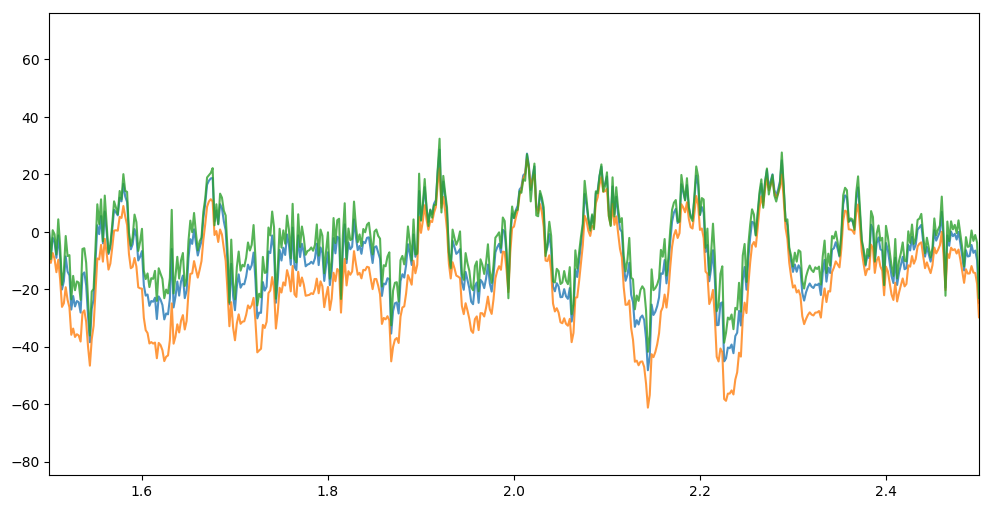

In [41]:
x_recon = np.fft.ifft(FC)
x_recon_steep = np.fft.ifft(FC_steep)
x_recon_flat = np.fft.ifft(FC_flat)

plt.figure(figsize=(12,6))
plt.plot(t, x, alpha=0.8)
plt.plot(t, x_recon_steep, alpha=0.8)
plt.plot(t, x_recon_flat, alpha=0.8)
plt.xlim(xl)

/Users/rgao/Documents/Code/research/neurodsp/neurodsp/filt.py:229: ComplexWarning: Casting complex values to real discards the imaginary part
  x_filt_full[first_nonan:last_nonan] = x_filt


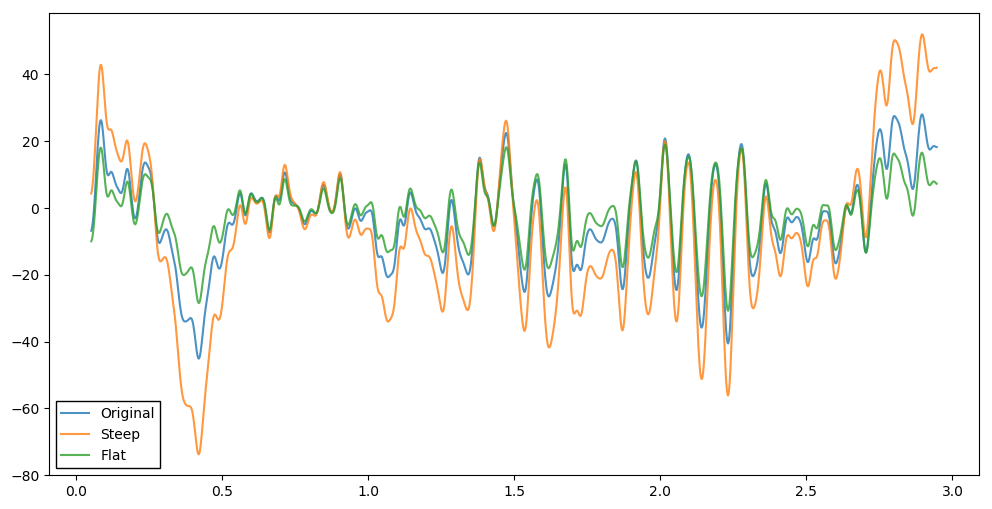

In [35]:
plt.figure(figsize=(12,6))
plt.plot(t,ndsp.filter(x, 500, 'lowpass', f_lo=30), alpha=0.8)
plt.plot(t,ndsp.filter(x_recon_steep, 500, 'lowpass', f_lo=30), alpha=0.8)
plt.plot(t,ndsp.filter(x_recon_flat, 500, 'lowpass', f_lo=30), alpha=0.8)
plt.legend(('Original', 'Steep', 'Flat'))